In [1]:
from skimage.io import imread
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.measure import regionprops
from scipy import stats
import string

op = os.path

ROOT = '/media/jaidevd/motherbox/archive/pennfudan/PennFudanPed/PedMasks/'
files = os.listdir(ROOT)

In [9]:
pl = []
for file in files:
    x = imread(op.join(ROOT, file))
    imsizes[file] = x.size
    rp = regionprops(x)
    pl.append({'file': file, 'size': np.mean(np.array([r.area for r in rp]) / x.size)})

df = pd.DataFrame.from_records(pl)

<AxesSubplot:ylabel='Density'>

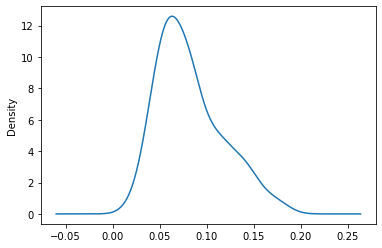

In [11]:
df['size'].plot(kind='kde')

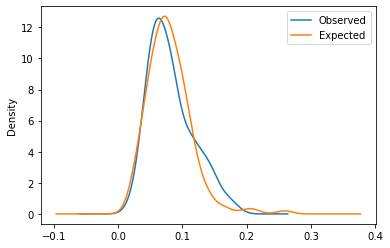

In [13]:
X_params = stats.lognorm.fit(df['size'])
X_logN = stats.lognorm(*X_params)

x_exp = X_logN.rvs(size=(170,))
ax = df['size'].plot(kind='kde', label='Observed')
pd.Series(x_exp).plot(kind='kde', label='Expected', ax=ax)
plt.legend()

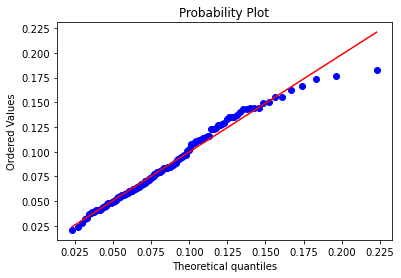

In [15]:
_ = stats.probplot(df['size'].values, sparams=X_params, dist='lognorm', plot=plt)

In [17]:
stats.normaltest(np.log(df['size']))

NormaltestResult(statistic=0.8591641604987801, pvalue=0.6507810121378242)

In [20]:
X_logN.ppf(0.01), X_logN.ppf(0.99)

(0.027039452745058486, 0.196204473184746)

In [21]:
df['size'].min(), df['size'].max()

(0.02091332117518137, 0.18285652629631916)

In [28]:
# Nonparametric approach
np.arange(0.02, 0.22, 0.02).shape

(10,)

<AxesSubplot:>

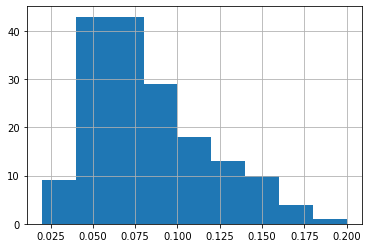

In [43]:
df['size'].hist(bins=edges)

In [56]:
edges = np.round(np.arange(0.02, 0.22, 0.02), 2)

0      B
1      C
2      C
3      D
4      B
      ..
165    C
166    C
167    G
168    H
169    C
Name: size, Length: 170, dtype: category
Categories (9, object): ['A' < 'B' < 'C' < 'D' ... 'F' < 'G' < 'H' < 'I']

In [63]:
df['binlabel'] = pd.cut(df['size'], edges, right=False, labels=list(string.ascii_uppercase[:len(edges) -1]))

In [65]:
df['binlabel'].value_counts().sort_index()

A     9
B    43
C    43
D    29
E    18
F    13
G    10
H     4
I     1
Name: binlabel, dtype: int64

In [67]:
df.loc[df['binlabel'] == 'I', 'binlabel'] = 'H'
df['binlabel'].value_counts().sort_index()

A     9
B    43
C    43
D    29
E    18
F    13
G    10
H     5
I     0
Name: binlabel, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, stratify=df['binlabel'], train_size=100)

In [72]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)